In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from scipy.signal import savgol_filter
import seaborn as sns 

In [2]:
#sst = loadmat("/home/cl/Downloads/Insync/Work/Thesis/database/temperature/SST2005.mat")
sst = loadmat("/media/cl/ext4/16tb/research_database/wimsoft/sst/200501/SST2005.mat")

In [3]:
sst['time'][0:30]

array([[2005,    1,    1,    0,    0,    0],
       [2005,    1,    2,    0,    0,    0],
       [2005,    1,    3,    0,    0,    0],
       [2005,    1,    4,    0,    0,    0],
       [2005,    1,    5,    0,    0,    0],
       [2005,    1,    6,    0,    0,    0],
       [2005,    1,    7,    0,    0,    0],
       [2005,    1,    8,    0,    0,    0],
       [2005,    1,    9,    0,    0,    0],
       [2005,    1,   10,    0,    0,    0],
       [2005,    1,   11,    0,    0,    0],
       [2005,    1,   12,    0,    0,    0],
       [2005,    1,   13,    0,    0,    0],
       [2005,    1,   14,    0,    0,    0],
       [2005,    1,   15,    0,    0,    0],
       [2005,    1,   16,    0,    0,    0],
       [2005,    1,   17,    0,    0,    0],
       [2005,    1,   18,    0,    0,    0],
       [2005,    1,   19,    0,    0,    0],
       [2005,    1,   20,    0,    0,    0],
       [2005,    1,   21,    0,    0,    0],
       [2005,    1,   22,    0,    0,    0],
       [20

In [4]:
bathy = loadmat("/media/cl/ext4/16tb/research_database/bathymetry/gebco/bathy.mat")

In [5]:
sst200501 = np.nanmean(sst['SST'][:,:,0:30], axis = 2)
lon_sst200501 = sst['LON']
lat_sst200501 = sst['LAT']


/tmp/ipykernel_14977/2581624373.py:1: RuntimeWarning: Mean of empty slice
  sst200501 = np.nanmean(sst['SST'][:,:,0:30], axis = 2)


In [6]:
import pickle
with open('sst_200501.pkl', 'wb') as f:
    pickle.dump({'lon': lon_sst200501, 'lat': lat_sst200501, 'sst': sst200501}, f)

In [7]:
with open('/home/cl/Dropbox/16tb/research_codes/drifter/drifters.pkl', 'rb') as f:
    drifter = pickle.load(f)

In [8]:
#with open('sst_data.pkl', 'rb') as f:
#    data = pickle.load(f)

/home/cl/anaconda3/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


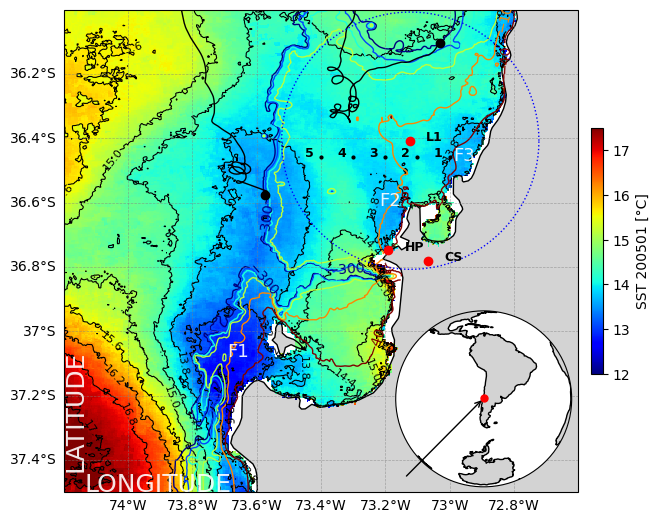

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import numpy as np

from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 100
pyplot.rcParams['savefig.dpi'] = 100

# Define station positions (lon, lat, label)
stations = [
    (-73.06639, -36.78055, "CS"),
    (-73.190555, -36.748055, "HP"),
    (-73.1224, -36.4075, "L1")
]

test = [
    (-73.0, -36.4575, "1"),
    (-73.1, -36.4575, "2"),
    (-73.2, -36.4575, "3"),
    (-73.3, -36.4575, "4"),
    (-73.4, -36.4575, "5")
]

# Figure
fig = plt.figure(figsize=(8, 8))
proj = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent([-74.2, -72.6, -37.5, -36], crs=proj)

# Coastline and land
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(color='black', linewidth=1)

# Plot SST
pcm = ax.pcolormesh(lon_sst200501, lat_sst200501, sst200501, cmap='jet', shading='auto', transform=proj, vmin = 12, vmax = 17.5)
cs = ax.contour(lon_sst200501, lat_sst200501, sst200501, 16, colors='k', linewidths=0.8, transform=proj)
ax.clabel(cs, inline=True, fontsize=8, fmt="%.1f")

levels = [-300, -250, -200, -150, -100, -40]
CS = ax.contour(bathy['LON'],bathy['LAT'],bathy['alt'], levels=levels, cmap='jet', linewidths = 1)
ax.clabel(CS, levels, inline=True, fontsize=10)

# Colorbar
cbar = plt.colorbar(pcm, ax=ax, shrink=0.4, orientation="vertical", pad=0.02)
cbar.set_label("SST 200501 [°C]")

plt.text(-74.135, -37.5, 'LONGITUDE', fontsize=18, alpha=0.9, color='white')
plt.text(-74.2, -37.42, 'LATITUDE', fontsize=18, alpha=0.9, color='white', rotation=90)

plt.text(-72.99, -36.47, 'F3', fontsize=13, alpha=0.9, color='white')
plt.text(-73.22, -36.61, 'F2', fontsize=13, alpha=0.9, color='white')
plt.text(-73.69, -37.08, 'F1', fontsize=13, alpha=0.9, color='white')

# Gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.6, linestyle='--')
gl.right_labels = False
gl.top_labels = False

# Add station markers
for x, y, name in stations:
    ax.plot(x, y, 'o', color='red', markersize=6, transform=proj)
    ax.text(x + 0.05, y, name, color='k', fontsize=9, weight='bold', transform=proj)

for x, y, name in test:
    ax.plot(x, y, 'o', color='k', markersize=2, transform=proj)
    ax.text(x - 0.05, y, name, color='k', fontsize=9, weight='bold', transform=proj)

ax.plot(savgol_filter(drifter['lon'][628:900],20,2), savgol_filter(drifter['lat'][628:900],20,2), linewidth = 1, color  = 'k')
ax.plot(savgol_filter(drifter['lon'][2300:2700],20,2), savgol_filter(drifter['lat'][2300:2700],20,2), linewidth = 1, color  = 'k')

ax.plot(drifter['lon'][628], drifter['lat'][628], marker = 'o', color = 'k')
ax.plot(drifter['lon'][2300], drifter['lat'][2300], marker = 'o', color = 'k')

center_x = -73.1224
center_y = -36.4075
radius = 0.4
theta = np.linspace(0, 2 * np.pi, 100)
x = center_x + radius * np.cos(theta)
y = center_y + radius * np.sin(theta)
ax.plot(x, y, color='blue', linewidth=1, linestyle = ':')


# Inset globe (circular)
ax_inset = fig.add_axes([0.54, 0.20, 0.22, 0.22], projection=ccrs.Orthographic(central_longitude=-72, central_latitude=-36.4))
ax_inset.add_feature(cfeature.LAND, facecolor='lightgray')
ax_inset.add_feature(cfeature.COASTLINE, color='black')
ax_inset.set_global()

# Make inset circular
theta = np.linspace(0, 2*np.pi, 100)
circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + 0.5)
ax_inset.set_boundary(circle, transform=ax_inset.transAxes)

x_pt, y_pt = -72, -36
ax_inset.plot(x_pt, y_pt, 'ro', markersize=5, transform=proj, zorder=6)
ax_inset.annotate("",
                  xy=(x_pt, y_pt), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax_inset),
                  xytext=(0.05, 0.05), textcoords='axes fraction',
                  arrowprops=dict(arrowstyle="->", color="k", lw=1))


plt.show()